Hello!

In this project, I intend to use the zillow API to access properties for rent listings in the minneapolis area. With this data, I will use machine learning tecniques to predict the price of rental of different listings if they were located in minneapolis. This is intended to be a comparative tool for those looking to move to the city, and predict what the price would be of different listings.

The steps:
1. Access the API and return data of all rentals in minneapolis.
2. Use data visualization methods to understand the current real estate market.
3. Aggregate and clean data
4. Create a linear regression model and train based on data
5. Implement a front-end UI for stakeholders to predict cost based on given criteria.

In [35]:
#     ------ Step 1 --------
# Access the Zillo data using rapid APi
import numpy as np
from matplotlib import pyplot as pyplot
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import json
import pandas as pd
import requests

url = "https://zillow56.p.rapidapi.com/search"

querystring = {"location":"minneapolis, mn","status":"forRent"}

headers = {
	"X-RapidAPI-Key": # Insert key here ,
	"X-RapidAPI-Host": "zillow56.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

# Create file 
with open('rental_data.json', 'w') as file:
        json.dump(response.json(), file)
        print("Response written to rental_data.json")

{'results': [{'bathrooms': 1.0, 'bedrooms': 1.0, 'city': 'Minneapolis', 'country': 'USA', 'currency': 'USD', 'daysOnZillow': 0, 'homeStatus': 'FOR_RENT', 'homeStatusForHDP': 'FOR_RENT', 'homeType': 'APARTMENT', 'imgSrc': 'https://photos.zillowstatic.com/fp/3a05c59b3ab0d77d1f90449f35d0a7e9-p_e.jpg', 'isFeatured': True, 'isNonOwnerOccupied': True, 'isPreforeclosureAuction': False, 'isPremierBuilder': False, 'isRentalWithBasePrice': False, 'isShowcaseListing': False, 'isUnmappable': False, 'isZillowOwned': False, 'latitude': 44.99996, 'listing_sub_type': {}, 'livingArea': 768.0, 'longitude': -93.26879, 'price': 1812.0, 'priceForHDP': 1812.0, 'rentZestimate': 1755, 'shouldHighlight': False, 'state': 'MN', 'streetAddress': '1215 Marshall St NE #203', 'unit': '# 203', 'zipcode': '55413', 'zpid': 2079532668}, {'bathrooms': 1.0, 'bedrooms': 1.0, 'city': 'Minneapolis', 'country': 'USA', 'currency': 'USD', 'daysOnZillow': 0, 'homeStatus': 'FOR_RENT', 'homeStatusForHDP': 'FOR_RENT', 'homeType': '

In [36]:
# Create DataFrame from json file
with open('rental_data.json', 'r') as file:
    rental_data = json.load(file)
    rental_data = rental_data['results']

df = pd.json_normalize(rental_data)

In [46]:
# Create DataFrame of relevant information 
relevant_columns = ['bathrooms', 'bedrooms','homeType', 'livingArea', 'price','zipcode']
df_relevant = df[relevant_columns]
df_relevant.head()

# Fill Null values with the median 
median = df_relevant['livingArea'].median()
df_relevant.loc[:, 'livingArea'] = df_relevant['livingArea'].fillna(median)


Now, we have created a DataFrame of relevant information. In this case, we identify that the Price is the dependent variable (What we will be trying to predict) and the other information are the independent variables that affect the price.


Text(0, 0.5, 'price per month')

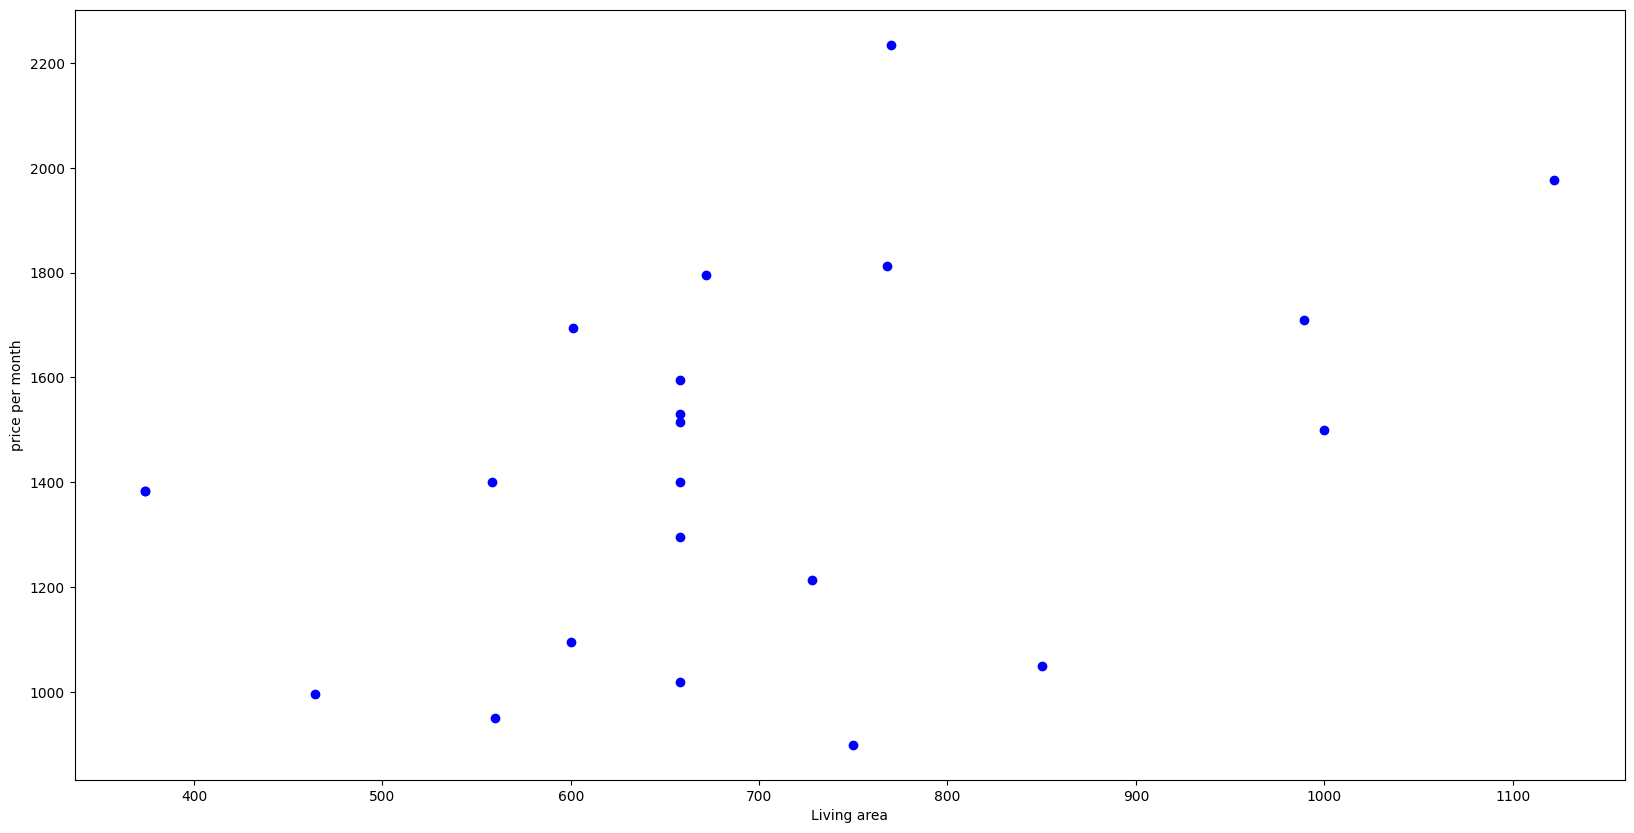

In [64]:
df2 = df_relevant.copy()
df2['pricePerSqft'] = df2['price'] / df2['livingArea']

bed_rooms = df2['bedrooms']
living_area = df2['livingArea']
price_per_sqft = df2['price']

bed0 = df[(df.)]
pyplot.scatter(living_area, price_per_sqft, color='blue', s=50)

pyplot.xlabel('Living area')
pyplot.ylabel('price per month')
